# Análisis de Datos de Egresos Hospitalarios 2024

4. Relación entre contaminantes ambientales y distribución de egresos hospitalarios en Chile

Fuente de datos: egresos hospitalarios DEIS 

Variable utilizar: Egresos donde las enfermedades podrían estar causadas por contaminantes ambientales

In [1]:
# Importar librerias
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Leer el archivo, pasarlo a dataframe y visualizarlo
df= pd.read_csv('EGRESOS_2024.csv', encoding='latin-1', sep=';', low_memory=False)
df.head()

,PERTENENCIA_ESTABLECIMIENTO_SALUD,SEXO,GRUPO_EDAD,GLOSA_PAIS_ORIGEN,COMUNA_RESIDENCIA,GLOSA_COMUNA_RESIDENCIA,REGION_RESIDENCIA,GLOSA_REGION_RESIDENCIA,PREVISION,GLOSA_PREVISION,ANO_EGRESO,DIAG1,DIAG2,DIAS_ESTADA,CONDICION_EGRESO
0,No Pertenecientes al Sistema Nacional de Servi...,1,1 A 4 AÑOS,Chile,01101,Iquique,01,De Tarapacá,1,FONASA,2024,N47X,NaN,1,1
1,No Pertenecientes al Sistema Nacional de Servi...,1,1 A 4 AÑOS,Chile,01101,Iquique,01,De Tarapacá,1,FONASA,2024,N47X,NaN,1,1
2,No Pertenecientes al Sistema Nacional de Servi...,1,1 A 4 AÑOS,Chile,01101,Iquique,01,De Tarapacá,1,FONASA,2024,Q531,NaN,1,1
3,No Pertenecientes al Sistema Nacional de Servi...,1,1 A 4 AÑOS,Chile,01101,Iquique,01,De Tarapacá,1,FONASA,2024,N47X,NaN,1,1
4,No Pertenecientes al Sistema Nacional de Servi...,1,1 A 4 AÑOS,Chile,01101,Iquique,01,De Tarapacá,1,FONASA,2024,N47X,NaN,1,1


### Análisis Exploratorio Inicial

In [3]:
# Ver información general del DataFrame
print(f"DataFrame shape: {df.shape}")
print("\nDataFrame columns:")
for col in df.columns:
    print(f"- {col}")

DataFrame shape: (1667349, 15)

DataFrame columns:
- PERTENENCIA_ESTABLECIMIENTO_SALUD
- SEXO
- GRUPO_EDAD
- GLOSA_PAIS_ORIGEN
- COMUNA_RESIDENCIA
- GLOSA_COMUNA_RESIDENCIA
- REGION_RESIDENCIA
- GLOSA_REGION_RESIDENCIA
- PREVISION
- GLOSA_PREVISION
- ANO_EGRESO
- DIAG1
- DIAG2
- DIAS_ESTADA
- CONDICION_EGRESO


In [4]:
print("\nDataFrame data types:")
for col in df.columns:
    print(f"- {col} : {df[col].dtype}")


DataFrame data types:
- PERTENENCIA_ESTABLECIMIENTO_SALUD : object
- SEXO : object
- GRUPO_EDAD : object
- GLOSA_PAIS_ORIGEN : object
- COMUNA_RESIDENCIA : object
- GLOSA_COMUNA_RESIDENCIA : object
- REGION_RESIDENCIA : object
- GLOSA_REGION_RESIDENCIA : object
- PREVISION : object
- GLOSA_PREVISION : object
- ANO_EGRESO : int64
- DIAG1 : object
- DIAG2 : object
- DIAS_ESTADA : int64
- CONDICION_EGRESO : int64


In [5]:
print("\nSummary statistics:")
print(df.describe(include='all').T)


Summary statistics:
                                       count unique  \
PERTENENCIA_ESTABLECIMIENTO_SALUD    1667349      2   
SEXO                                 1667349      3   
GRUPO_EDAD                           1667349     22   
GLOSA_PAIS_ORIGEN                    1667349    190   
COMUNA_RESIDENCIA                    1667349    343   
GLOSA_COMUNA_RESIDENCIA              1667349    343   
REGION_RESIDENCIA                    1666272     18   
GLOSA_REGION_RESIDENCIA              1667349     19   
PREVISION                            1667349      8   
GLOSA_PREVISION                      1667349      8   
ANO_EGRESO                         1667349.0    NaN   
DIAG1                                1667349   7162   
DIAG2                                 160737   1780   
DIAS_ESTADA                        1667349.0    NaN   
CONDICION_EGRESO                   1667349.0    NaN   

                                                                                 top  \
PERTENENCI

In [6]:
# Explorar valores únicos en columnas clave
print("Valores únicos en SEXO:")
print(df['SEXO'].value_counts())

print("\nValores únicos en GRUPO_EDAD:")
print(df['GRUPO_EDAD'].value_counts().sort_index())

Valores únicos en SEXO:
SEXO
2    950281
1    710853
*      6215
Name: count, dtype: int64

Valores únicos en GRUPO_EDAD:
GRUPO_EDAD
1 A 4 AÑOS                   53829
10 A 14 AÑOS                 46948
15 A 19 AÑOS                 54348
2 MESES A MENOS DE 1 AÑO     18914
20 A 24 AÑOS                 80340
25 A 29 AÑOS                110945
28 DIAS A 2 MES               3984
30 A 34 AÑOS                137464
35 A 39 AÑOS                125138
40 A 44 AÑOS                 99615
45 A 49 AÑOS                 87462
5 A 9 AÑOS                   52589
50 A 54 AÑOS                 91040
55 A 59 AÑOS                102125
60 A 64 AÑOS                115953
65 A 69 AÑOS                116720
7 A 27 DIAS                   5281
70 A 74 AÑOS                104227
75 A 79 AÑOS                 92283
80 A 84 AÑOS                 69633
85 A MAS                     71185
menor a 7 días               27326
Name: count, dtype: int64


In [7]:
print("\nValores únicos en CONDICION_EGRESO:")
print(df['CONDICION_EGRESO'].value_counts())

print("\nDistribución por región:")
print(df['GLOSA_REGION_RESIDENCIA'].value_counts())


Valores únicos en CONDICION_EGRESO:
CONDICION_EGRESO
1    1627750
2      39599
Name: count, dtype: int64

Distribución por región:
GLOSA_REGION_RESIDENCIA
Metropolitana de Santiago                  657535
De Valparaíso                              168080
Del Bíobío                                 167812
De La Araucanía                             93535
Del Maule                                   91249
De Los Lagos                                85625
Del Libertador B. O'Higgins                 76847
De Antofagasta                              58589
De Coquimbo                                 56811
De Ñuble                                    46534
De Los Ríos                                 40940
De Tarapacá                                 32303
De Atacama                                  23644
De Arica y Parinacota                       20558
Ignorada                                    18965
De Aisén del Gral. C. Ibáñez del Campo      11916
De Magallanes y de La Antártica Chilena     

In [11]:
codigos = pd.read_excel(('Diccionario BD egresos hospitalario.xlsx'), sheet_name='codigo CIE-10', engine='openpyxl', skiprows=8)
codigos.head(10)

,CODIGO SUBCATEGORIA,GLOSA SUBCATEGORIA,CAPITULO,GLOSA CAPITULO,CODIGO GRUPO,GLOSA GRUPO,CODIGO CATEGORIA,GLOSA CATEGORIA
0,A000,"CÓLERA DEBIDO A VIBRIO CHOLERAE O1, BIOTIPO CH...",A00-B99,Ciertas enfermedades infecciosas y parasitarias,A00-A09,Enfermedades infecciosas intestinales,A00,Cólera
1,A001,"CÓLERA DEBIDO A VIBRIO CHOLERAE 01, BIOTIPO EL...",A00-B99,Ciertas enfermedades infecciosas y parasitarias,A00-A09,Enfermedades infecciosas intestinales,A00,Cólera
2,A009,"CÓLERA, NO ESPECIFICADO",A00-B99,Ciertas enfermedades infecciosas y parasitarias,A00-A09,Enfermedades infecciosas intestinales,A00,Cólera
3,A010,FIEBRE TIFOIDEA,A00-B99,Ciertas enfermedades infecciosas y parasitarias,A00-A09,Enfermedades infecciosas intestinales,A01,Fiebres tifoidea y paratifoidea
4,A011,FIEBRE PARATIFOIDEA A,A00-B99,Ciertas enfermedades infecciosas y parasitarias,A00-A09,Enfermedades infecciosas intestinales,A01,Fiebres tifoidea y paratifoidea
5,A012,FIEBRE PARATIFOIDEA B,A00-B99,Ciertas enfermedades infecciosas y parasitarias,A00-A09,Enfermedades infecciosas intestinales,A01,Fiebres tifoidea y paratifoidea
6,A013,FIEBRE PARATIFOIDEA C,A00-B99,Ciertas enfermedades infecciosas y parasitarias,A00-A09,Enfermedades infecciosas intestinales,A01,Fiebres tifoidea y paratifoidea
7,A014,"FIEBRE PARATIFOIDEA, NO ESPECIFICADA",A00-B99,Ciertas enfermedades infecciosas y parasitarias,A00-A09,Enfermedades infecciosas intestinales,A01,Fiebres tifoidea y paratifoidea
8,A020,ENTERITIS DEBIDA A SALMONELLA,A00-B99,Ciertas enfermedades infecciosas y parasitarias,A00-A09,Enfermedades infecciosas intestinales,A02,Otras infecciones debidas a Salmonella
9,A021,SEPTICEMIA DEBIDA A SALMONELLA,A00-B99,Ciertas enfermedades infecciosas y parasitarias,A00-A09,Enfermedades infecciosas intestinales,A02,Otras infecciones debidas a Salmonella


Ahora que tenemos los datos de egresos hospitalarios y los códigos CIE-10, podemos crear un dataframe con ambos, el plan sería:

1. Filtrar por los códigos que nos interesan
2. Unir los datos de egresos con la información de los códigos CIE-10 filtrados
2. Analizar la distribución de patologías por región (norte centro sur)
3. Identificar el top 10 de patologías a nivel nacional y por región

In [ ]:
# I , J , E , C0 a D48 (I cardio - J respiratorio - E endocrino (metabolica) - C0 a D48 neoplasias)
# Todas estas son las enfermedades que nos interesan para el análisis de enfermedades relacionadas con la contaminación ambiental
codigos_filtrados = codigos[codigos['CODIGO SUBCATEGORIA'].astype(str).str.startswith('J') |
                            codigos['CODIGO SUBCATEGORIA'].astype(str).str.startswith('I') |
                            codigos['CODIGO SUBCATEGORIA'].astype(str).str.startswith('E') |
                            (codigos['CODIGO SUBCATEGORIA'].astype(str) >= 'C0') & 
                            (codigos['CODIGO SUBCATEGORIA'].astype(str) <= 'D48')]

print(f"Número de códigos encontrados: {len(codigos_filtrados)}")
display(codigos_filtrados["CAPITULO"].value_counts())

Número de códigos encontrados: 1744


CAPITULO
C00-D48    760
I00-I99    394
E00-E90    356
J00-J99    234
Name: count, dtype: int64

In [ ]:
# Filtrar egresos hospitalarios por los códigos
# Consideramos tanto el diagnóstico principal (DIAG1) como el secundario (DIAG2)

# Filtrando diagnósticos por los códigos CIE-10 filtrados
df_resp = df[df['DIAG1'].isin(codigos_filtrados['CODIGO SUBCATEGORIA']) | 
             df['DIAG2'].isin(codigos_filtrados['CODIGO SUBCATEGORIA'])]

# Verificar el número de egresos hospitalarios y los relacionados con enfermedades respiratorias
print(f"\nTotal de egresos hospitalarios: {len(df)}")
print(f"Egresos hospitalarios por enfermedades respiratorias: {len(df_resp)} ({len(df_resp)/len(df)*100:.2f}%)")


Total de egresos hospitalarios: 1667349
Egresos hospitalarios por enfermedades respiratorias: 525351 (31.51%)



Distribución de egresos hospitalarios por zona geográfica:


/tmp/ipykernel_12218/3375977745.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resp['Zona'] = df_resp['GLOSA_REGION_RESIDENCIA'].map(zona_map)


,Zona,Cantidad
0,Centro,385383
2,Sur,77728
1,Norte,54470


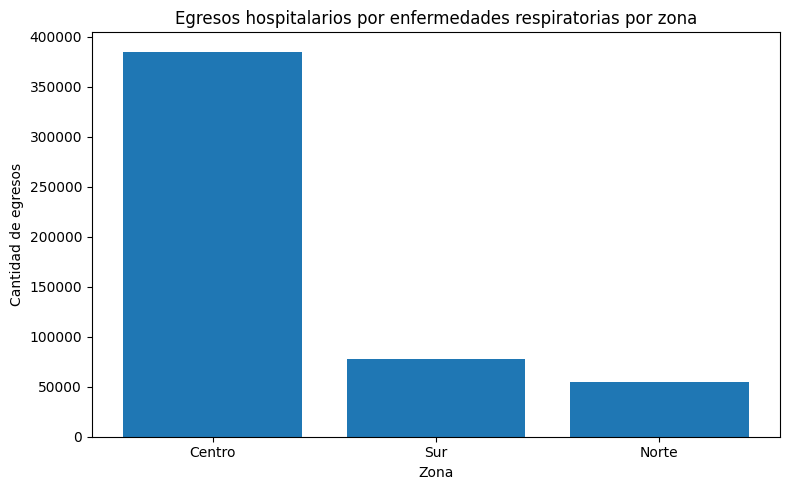

In [27]:
# Verificar la distribución por norte centro sur
zona_map = {
    'De Arica y Parinacota': 'Norte',
    'De Tarapacá': 'Norte',
    'De Antofagasta': 'Norte',
    'De Atacama': 'Norte',
    'De Coquimbo': 'Norte',
    
    'De Valparaíso': 'Centro',
    'Metropolitana de Santiago': 'Centro',
    "Del Libertador B. O'Higgins": 'Centro',
    'Del Maule': 'Centro',
    'De Ñuble': 'Centro',
    'Del Bíobío': 'Centro',

    'De La Araucanía': 'Sur',
    'De Los Ríos': 'Sur',
    'De Los Lagos': 'Sur',
    'De Aisén del Gral. C. Ibáñez del Campo': 'Sur',
    'De Magallanes y de La Antártica Chilena': 'Sur'
}

# Mapear zonas
df_resp['Zona'] = df_resp['GLOSA_REGION_RESIDENCIA'].map(zona_map)

# Eliminar filas con Zona nula (es decir, regiones que no están en zona_map)
df_resp_filtrado = df_resp.dropna(subset=['Zona'])

# Agrupar por zona
resp_por_zona = df_resp_filtrado.groupby('Zona').size().reset_index(name='Cantidad')
resp_por_zona = resp_por_zona.sort_values('Cantidad', ascending=False)

# Mostrar tabla
print("\nDistribución de egresos hospitalarios por zona geográfica:")
display(resp_por_zona)

# Visualizar con gráfico
plt.figure(figsize=(8, 5))
plt.bar(resp_por_zona['Zona'], resp_por_zona['Cantidad'])
plt.title('Egresos hospitalarios por enfermedades respiratorias por zona')
plt.xlabel('Zona')
plt.ylabel('Cantidad de egresos')
plt.tight_layout()
plt.show()



Distribución de egresos hospitalarios respiratorios por región:


,GLOSA_REGION_RESIDENCIA,Cantidad
18,Metropolitana de Santiago,208173
11,De Valparaíso,55256
13,Del Bíobío,53250
6,De La Araucanía,29828
7,De Los Lagos,29234
15,Del Maule,29198
14,Del Libertador B. O'Higgins,24027
5,De Coquimbo,18214
2,De Antofagasta,16520
12,De Ñuble,15479


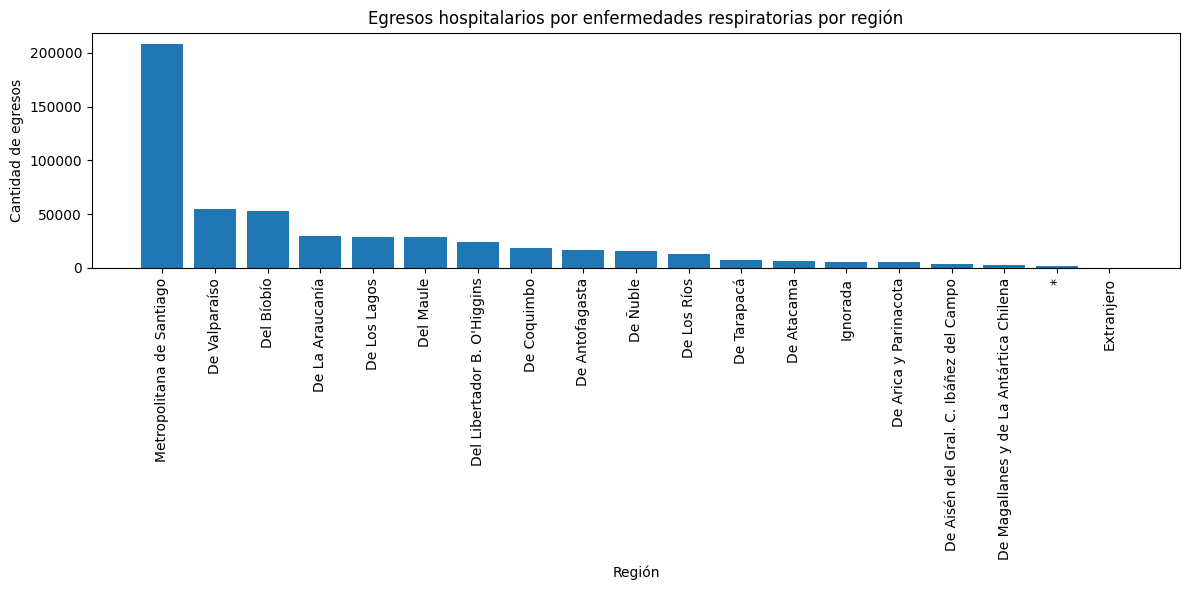

In [23]:
# Verificar la distribución por región
resp_por_region = df_resp.groupby('GLOSA_REGION_RESIDENCIA').size().reset_index(name='Cantidad')
resp_por_region = resp_por_region.sort_values('Cantidad', ascending=False)

print("\nDistribución de egresos hospitalarios respiratorios por región:")
display(resp_por_region)

# Visualizar la distribución por región
plt.figure(figsize=(12, 6))
plt.bar(resp_por_region['GLOSA_REGION_RESIDENCIA'], resp_por_region['Cantidad'])
plt.xticks(rotation=90)
plt.title('Egresos hospitalarios por enfermedades respiratorias por región')
plt.xlabel('Región')
plt.ylabel('Cantidad de egresos')
plt.tight_layout()
plt.show()

In [ ]:
# Unir diagnósticos con la descripción de CIE-10
# Primero vamos a preparar los diagnósticos principales (DIAG1)

# Asegurar que los códigos estén en el formato correcto para la unión
df_resp['DIAG1_3char'] = df_resp['DIAG1'].astype(str).str[:3]
codigos['CODIGO_3char'] = codigos['CODIGO SUBCATEGORIA'].astype(str).str[:3]

# Unir los datos de egresos con los códigos CIE-10
df_resp_with_desc = df_resp.merge(
    codigos[['CODIGO_3char', 'GLOSA SUBCATEGORIA', 'GLOSA GRUPO', 'GLOSA CAPITULO']],
    left_on='DIAG1_3char',
    right_on='CODIGO_3char',
    how='left'
)

# Verificar la unión
print(f"Registros antes de la unión: {len(df_resp)}")
print(f"Registros después de la unión: {len(df_resp_with_desc)}")
print(f"Registros con descripción: {df_resp_with_desc['GLOSA SUBCATEGORIA'].count()}")
print(f"Registros sin descripción: {df_resp_with_desc['GLOSA SUBCATEGORIA'].isna().sum()}")

# Ver algunos ejemplos de la unión
print("\nEjemplos de diagnósticos con su descripción:")
display(df_resp_with_desc[['DIAG1', 'DIAG1_3char', 'CODIGO_3char', 'GLOSA SUBCATEGORIA', 'GLOSA GRUPO']].head(10))

# Análisis del top 10 de diagnósticos respiratorios a nivel nacional
top_diagnosticos = df_resp_with_desc.groupby(['DIAG1_3char', 'GLOSA SUBCATEGORIA', 'GLOSA GRUPO']).size().reset_index(name='Cantidad')
top_diagnosticos = top_diagnosticos.sort_values('Cantidad', ascending=False).head(10)

print("\nTop 10 de diagnósticos respiratorios a nivel nacional:")
display(top_diagnosticos)

# Visualizar el top 10 nacional de diagnósticos respiratorios
plt.figure(figsize=(14, 6))
plt.bar(top_diagnosticos['GLOSA SUBCATEGORIA'].str[:30], top_diagnosticos['Cantidad'])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 de diagnósticos respiratorios a nivel nacional')
plt.xlabel('Diagnóstico')
plt.ylabel('Cantidad de egresos')
plt.tight_layout()
plt.show()